In [59]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [27]:
import yfinance as yf
import datetime as dt
import time

In [196]:
def consulta_bc(codigo_bcb: int) -> pd.DataFrame: 
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json'
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    return df

In [197]:
pib = consulta_bc(1207)

In [198]:
print(pib)

         data         valor
0  1962-01-01  0.000000e+00
1  1963-01-01  0.000000e+00
2  1964-01-01  1.000000e-02
3  1965-01-01  2.000000e-02
4  1966-01-01  2.000000e-02
5  1967-01-01  3.000000e-02
6  1968-01-01  4.000000e-02
7  1969-01-01  6.000000e-02
8  1970-01-01  7.000000e-02
9  1971-01-01  9.000000e-02
10 1972-01-01  1.300000e-01
11 1973-01-01  1.900000e-01
12 1974-01-01  2.700000e-01
13 1975-01-01  3.800000e-01
14 1976-01-01  5.900000e-01
15 1977-01-01  9.100000e-01
16 1978-01-01  1.320000e+00
17 1979-01-01  2.170000e+00
18 1980-01-01  4.550000e+00
19 1981-01-01  8.730000e+00
20 1982-01-01  1.770000e+01
21 1983-01-01  3.978000e+01
22 1984-01-01  1.265000e+02
23 1985-01-01  4.755300e+02
24 1986-01-01  1.273680e+03
25 1987-01-01  4.037810e+03
26 1988-01-01  2.937563e+04
27 1989-01-01  4.255953e+05
28 1990-01-01  1.154879e+07
29 1991-01-01  6.028600e+07
30 1992-01-01  6.409588e+08
31 1993-01-01  1.409711e+10
32 1994-01-01  3.492047e+11
33 1995-01-01  7.059916e+11
34 1996-01-01  8.547

In [199]:
pib.shape

(59, 2)

In [200]:
pib.rename(columns = {'data':'Date'}, inplace = True)
pib.rename(columns = {'valor':'PIB'}, inplace = True)

In [201]:
pib.dtypes

Date    datetime64[ns]
PIB            float64
dtype: object

In [202]:
pib.columns

Index(['Date', 'PIB'], dtype='object')

In [203]:
stocks_br = pd.read_csv('../data/interim/ibovfull.csv')
stocks_br['Date'] = pd.to_datetime(stocks_br['Date'], dayfirst=True)

In [204]:
print(stocks_br)

             Date   Open   High    Low  Close  Adj Close       Volume   Name
0      2011-06-29  13.15  15.15  13.02  15.05  10.347832   10092400.0  QUAL3
1      2011-06-30  15.18  15.18  14.60  14.90  10.244698     807400.0  QUAL3
2      2011-07-01  14.50  15.20  14.42  15.00  10.313454     351100.0  QUAL3
3      2011-07-04  14.81  14.89  14.60  14.75  10.141562     358600.0  QUAL3
4      2011-07-05  14.55  15.00  14.55  14.89  10.237821     206200.0  QUAL3
...           ...    ...    ...    ...    ...        ...          ...    ...
303786 2021-03-26   4.00   4.00   3.81   3.81   3.810000   67854200.0  COGN3
303787 2021-03-29   3.83   3.85   3.72   3.77   3.770000   42215200.0  COGN3
303788 2021-03-30   3.74   3.91   3.71   3.86   3.860000   45805200.0  COGN3
303789 2021-03-31   3.80   4.11   3.76   3.98   3.980000  125676300.0  COGN3
303790 2021-04-01   3.99   4.03   3.84   3.84   3.840000   47745900.0  COGN3

[303791 rows x 8 columns]


In [205]:
qtde_acoes = pd.read_excel('../data/interim/tbl_valor_mercado_010421.xlsx')

In [206]:
print(qtde_acoes)

     Name nome_empresa  valor_mercado_reais_010421  valor_mercado_us_010421  \
0   ABEV3    AMBEV S/A                2.406530e+08              42239838.18   
1   ASAI3        ASSAI                1.981508e+07               3477977.24   
2   AZUL4         AZUL                1.255275e+07               2203280.99   
3   BTOW3  B2W DIGITAL                3.402521e+07               5972164.01   
4   B3SA3           B3                1.115340e+08              19576648.59   
..    ...          ...                         ...                      ...   
77  USIM5     USIMINAS                2.198492e+07               3858831.26   
78  VALE3         VALE                5.177200e+08              90871113.20   
79  VVAR3    VIAVAREJO                1.928006e+07               3384070.35   
80  WEGE3          WEG                1.564760e+08              27464942.16   
81  YDUQ3   YDUQS PART                8.255763e+06               1449065.91   

    Close_010421  qtde_acoes_010421  
0      15.000

In [207]:
df = pd.merge(stocks_br,qtde_acoes,on='Name',how='left')

In [208]:
print(df)

             Date   Open   High    Low  Close  Adj Close       Volume   Name  \
0      2011-06-29  13.15  15.15  13.02  15.05  10.347832   10092400.0  QUAL3   
1      2011-06-30  15.18  15.18  14.60  14.90  10.244698     807400.0  QUAL3   
2      2011-07-01  14.50  15.20  14.42  15.00  10.313454     351100.0  QUAL3   
3      2011-07-04  14.81  14.89  14.60  14.75  10.141562     358600.0  QUAL3   
4      2011-07-05  14.55  15.00  14.55  14.89  10.237821     206200.0  QUAL3   
...           ...    ...    ...    ...    ...        ...          ...    ...   
303786 2021-03-26   4.00   4.00   3.81   3.81   3.810000   67854200.0  COGN3   
303787 2021-03-29   3.83   3.85   3.72   3.77   3.770000   42215200.0  COGN3   
303788 2021-03-30   3.74   3.91   3.71   3.86   3.860000   45805200.0  COGN3   
303789 2021-03-31   3.80   4.11   3.76   3.98   3.980000  125676300.0  COGN3   
303790 2021-04-01   3.99   4.03   3.84   3.84   3.840000   47745900.0  COGN3   

       nome_empresa  valor_mercado_reai

In [209]:
df['Marketcap'] = df['qtde_acoes_010421'] * df['Close']

In [210]:
print(df)

             Date   Open   High    Low  Close  Adj Close       Volume   Name  \
0      2011-06-29  13.15  15.15  13.02  15.05  10.347832   10092400.0  QUAL3   
1      2011-06-30  15.18  15.18  14.60  14.90  10.244698     807400.0  QUAL3   
2      2011-07-01  14.50  15.20  14.42  15.00  10.313454     351100.0  QUAL3   
3      2011-07-04  14.81  14.89  14.60  14.75  10.141562     358600.0  QUAL3   
4      2011-07-05  14.55  15.00  14.55  14.89  10.237821     206200.0  QUAL3   
...           ...    ...    ...    ...    ...        ...          ...    ...   
303786 2021-03-26   4.00   4.00   3.81   3.81   3.810000   67854200.0  COGN3   
303787 2021-03-29   3.83   3.85   3.72   3.77   3.770000   42215200.0  COGN3   
303788 2021-03-30   3.74   3.91   3.71   3.86   3.860000   45805200.0  COGN3   
303789 2021-03-31   3.80   4.11   3.76   3.98   3.980000  125676300.0  COGN3   
303790 2021-04-01   3.99   4.03   3.84   3.84   3.840000   47745900.0  COGN3   

       nome_empresa  valor_mercado_reai

In [211]:
mktcap_br = df.groupby(
     ['Date']
 ).agg(
     Marketcap_br = ('Marketcap','sum'),
 ).reset_index()

In [212]:
# mktcap_br['Date'] = pd.to_datetime(mktcap_br['Date'], dayfirst=True)

In [214]:
mktcap_br.dtypes

Date            datetime64[ns]
Marketcap_br           float64
dtype: object

In [215]:
mktcap_br['Marketcap_br'] = mktcap_br['Marketcap_br'] *1000

In [234]:
print(mktcap_br)

           Date  Marketcap_br  Year
0    2000-01-03  3.592850e+15  2000
1    2000-01-04  3.598467e+15  2000
2    2000-01-05  3.323944e+15  2000
3    2000-01-06  3.324293e+15  2000
4    2000-01-07  3.599091e+15  2000
...         ...           ...   ...
5338 2021-03-29  4.083591e+12  2021
5339 2021-03-30  4.138180e+12  2021
5340 2021-03-31  4.126788e+12  2021
5341 2021-04-01  4.072060e+12  2021
5342 2021-04-02  0.000000e+00  2021

[5343 rows x 3 columns]


In [233]:
mktcap_br['Year'] = mktcap_br['Date'].dt.to_period('Y')

In [235]:
pib['Year'] = pib['Date'].dt.to_period('Y')

In [236]:
print(pib)

         Date           PIB  Year
0  1962-01-01  0.000000e+00  1962
1  1963-01-01  0.000000e+00  1963
2  1964-01-01  1.000000e-02  1964
3  1965-01-01  2.000000e-02  1965
4  1966-01-01  2.000000e-02  1966
5  1967-01-01  3.000000e-02  1967
6  1968-01-01  4.000000e-02  1968
7  1969-01-01  6.000000e-02  1969
8  1970-01-01  7.000000e-02  1970
9  1971-01-01  9.000000e-02  1971
10 1972-01-01  1.300000e-01  1972
11 1973-01-01  1.900000e-01  1973
12 1974-01-01  2.700000e-01  1974
13 1975-01-01  3.800000e-01  1975
14 1976-01-01  5.900000e-01  1976
15 1977-01-01  9.100000e-01  1977
16 1978-01-01  1.320000e+00  1978
17 1979-01-01  2.170000e+00  1979
18 1980-01-01  4.550000e+00  1980
19 1981-01-01  8.730000e+00  1981
20 1982-01-01  1.770000e+01  1982
21 1983-01-01  3.978000e+01  1983
22 1984-01-01  1.265000e+02  1984
23 1985-01-01  4.755300e+02  1985
24 1986-01-01  1.273680e+03  1986
25 1987-01-01  4.037810e+03  1987
26 1988-01-01  2.937563e+04  1988
27 1989-01-01  4.255953e+05  1989
28 1990-01-01 

In [237]:
# combined = pd.concat([pib,mktcap_br], ignore_index=True)
combined = pd.merge(mktcap_br,pib,on='Year',how='left')

In [230]:
combined = pd.merge(mktcap_br.assign(grouper=mktcap_br['Date'].dt.to_period('Y')),
               pib.assign(grouper=pib['Date'].dt.to_period('Y')),
               how='left', on='Date')

In [238]:
print(combined)

         Date_x  Marketcap_br  Year     Date_y           PIB
0    2000-01-03  3.592850e+15  2000 2000-01-01  1.199092e+12
1    2000-01-04  3.598467e+15  2000 2000-01-01  1.199092e+12
2    2000-01-05  3.323944e+15  2000 2000-01-01  1.199092e+12
3    2000-01-06  3.324293e+15  2000 2000-01-01  1.199092e+12
4    2000-01-07  3.599091e+15  2000 2000-01-01  1.199092e+12
...         ...           ...   ...        ...           ...
5338 2021-03-29  4.083591e+12  2021        NaT           NaN
5339 2021-03-30  4.138180e+12  2021        NaT           NaN
5340 2021-03-31  4.126788e+12  2021        NaT           NaN
5341 2021-04-01  4.072060e+12  2021        NaT           NaN
5342 2021-04-02  0.000000e+00  2021        NaT           NaN

[5343 rows x 5 columns]


In [239]:
# Get a list of dates available in the GDP dataframe
gdp_dates = mktcap_br['Date']

# Loop through the dgp dates and fill the GDP column in the combined dataframe
prev_date = None
for date in gdp_dates:
    if prev_date == None:
        combined.loc[:date,'PIB'] = pib.loc[date,'PIB']
    else:
        combined.loc[date_prev:date,'PIB'] = pib.loc[date_prev,'PIB']
    date_prev = date
    
combined.loc[date:,'PIB'] = pib.loc[date,'PIB']

KeyError: Timestamp('2000-01-03 00:00:00')

In [240]:
print(combined.tail())

         Date_x  Marketcap_br  Year Date_y  PIB
5338 2021-03-29  4.083591e+12  2021    NaT  NaN
5339 2021-03-30  4.138180e+12  2021    NaT  NaN
5340 2021-03-31  4.126788e+12  2021    NaT  NaN
5341 2021-04-01  4.072060e+12  2021    NaT  NaN
5342 2021-04-02  0.000000e+00  2021    NaT  NaN


In [241]:
combined['Buffett_Indicator'] = combined.Marketcap_br / combined.PIB 
print(combined.tail())

         Date_x  Marketcap_br  Year Date_y  PIB  Buffett_Indicator
5338 2021-03-29  4.083591e+12  2021    NaT  NaN                NaN
5339 2021-03-30  4.138180e+12  2021    NaT  NaN                NaN
5340 2021-03-31  4.126788e+12  2021    NaT  NaN                NaN
5341 2021-04-01  4.072060e+12  2021    NaT  NaN                NaN
5342 2021-04-02  0.000000e+00  2021    NaT  NaN                NaN


In [244]:
mask = (combined['Date_x'] > '28/08/2007') & (combined['Date_x'] <= '04/01/2021')

In [245]:
combined = combined.loc[mask]

In [242]:
combined.to_csv('../data/interim/Buffett_Indicator.csv', index=False)

In [252]:
combined.set_index('Date_x', inplace=True)

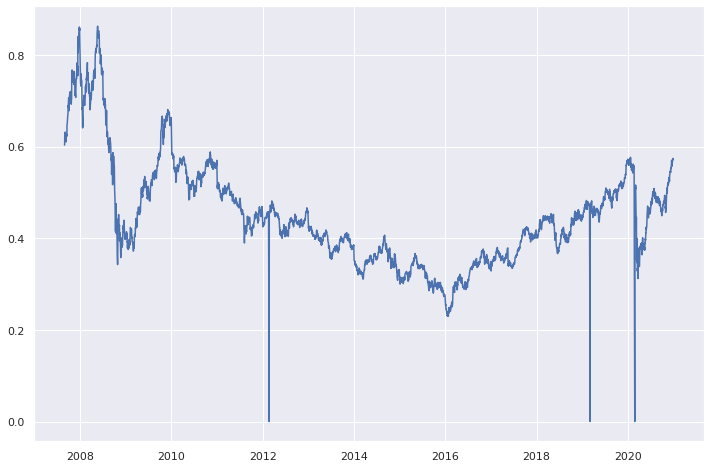

In [253]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Get the starting and ending date
min_date = combined.index.values[0]
max_date = combined.index.values[-1]
num_dates = len(combined.index.values)
quarter_date = combined.index.values[int(num_dates/4)]
three_quarter_date = combined.index.values[int(3*num_dates/4)]

plt.plot(combined.index.values,combined.Buffett_Indicator)

plt.show()

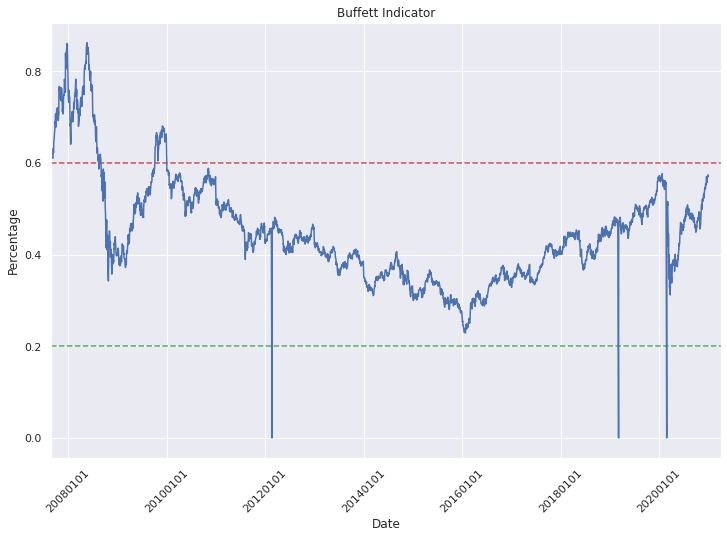

In [263]:
fig = plt.figure(figsize=(12,8))

plt.plot(combined.index.values,combined.Buffett_Indicator)

ax = plt.gca()

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y%m%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Buffett Indicator')
ax.set_xlim(min_date,max_date)

# Rotate the x-tick labels so that they are more legible
plt.xticks(rotation=45)

# Add the horizontal lines
plt.hlines(0.60,min_date,max_date,colors='r',linestyle='dashed')
plt.hlines(0.20,min_date,max_date,colors='g',linestyle='dashed')

# plt.text(quarter_date,100,'Over-valued',ha='center',va='center',color='r',backgroundcolor='white')
# plt.text(three_quarter_date,80,'Under-valued',ha='center',va='center',color='g',backgroundcolor='white')

plt.show()